In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Checking the missing values
round(train.isnull().sum()*100/train.shape[0],1)

# With a mojority of null values, let's ignore "Cabin". 

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
Sex_bin         0.0
dtype: float64

In [3]:
# Enconding other variables

## Sex

def sex_to_bin(sex):
    if sex == 'male':
        return 1
    else:
        return 0
train['Sex_bin'] = train['Sex'].map(sex_to_bin) 
test['Sex_bin']  = test['Sex'].map(sex_to_bin)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
# Enconding other variables

## Name
# honorific = []
# for name in train['Name'].str.split():
#     honorific.append(name[1])
# print(set(honorific))

for dataset in [train,test]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Jonkheer      1
Lady          1
Sir           1
Countess      1
Mme           1
Don           1
Ms            1
Name: Title, dtype: int64

In [9]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in [train,test]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,Title,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1


In [7]:
f = pd.get_dummies(train['Embarked'])
train = pd.concat([train,f], axis = 1)

f = pd.get_dummies(test['Embarked'])
test = pd.concat([test,f], axis = 1)


In [8]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin,C,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


(array([496.,   0.,   0., 161.,   0.,   0., 181.,   0.,   0.,  53.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

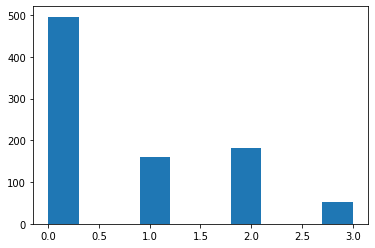

In [12]:
plt.hist(train['Fare'])

In [11]:
def fare_cons(fare):
    if fare <= 17:
        return 0
    elif fare <= 30:
        return 1
    elif fare <= 100:
        return 2
    else:
        return 3

for dataset in [train,test]:
    dataset['Fare'] = dataset['Fare'].map(fare_cons)     


In [10]:
# plt.hist(train['Age'])

def fare_cons(fare):
    if fare <= 20:
        return 0
    elif fare <= 40:
        return 1
    else:
        return 2
for dataset in [train,test]:
    dataset['Age_t'] = dataset['Age'].map(fare_cons)     



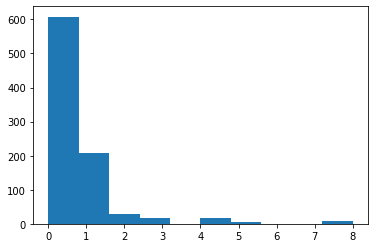

In [13]:
 plt.hist(train['SibSp'])

def sib_cons(sib):
    if sib <= 1:
        return 0
    elif sib <= 2:
        return 1
    else:
        return 2
for dataset in [train,test]:
    dataset['Sib_t'] = dataset['SibSp'].map(sib_cons)


<AxesSubplot:>

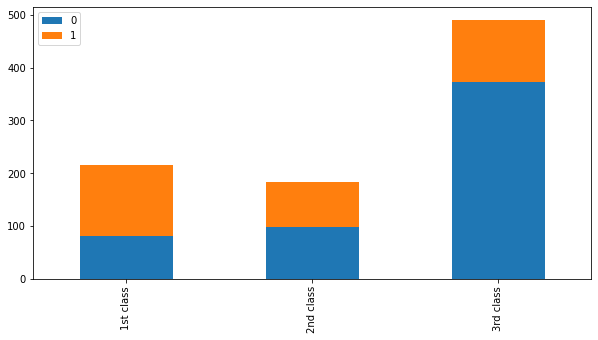

In [14]:
Pclass1 = train[train['Pclass']==1]['Survived'].value_counts()
Pclass2 = train[train['Pclass']==2]['Survived'].value_counts()
Pclass3 = train[train['Pclass']==3]['Survived'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
def class_cons(c):
    if c <= 2:
        return 0
    else:
        return 1
for dataset in [train,test]:
    dataset['class_t'] = dataset['Pclass'].map(class_cons)

In [17]:
variables = ['Survived','Pclass','class_t','Age','Age_t','Sib_t','SibSp','Parch','Fare','Sex_bin','C','Q','S','Title']
X = train[variables]
# X.head()
abs(X.corr()['Survived']).sort_values()

Q           0.003650
SibSp       0.035322
Age         0.077221
Parch       0.081629
Sib_t       0.093827
Age_t       0.099866
S           0.155660
C           0.168240
Fare        0.292884
class_t     0.322308
Pclass      0.338481
Title       0.445792
Sex_bin     0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [18]:
variables = ['class_t','Fare','Sex_bin','C','S','Title','Age_t','Sib_t']
X = train[variables]
y = train['Survived']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier(n_neighbors = 13)
model4 = GaussianNB()
model5 = SVC()

models =[model1,model2,model3,model4,model5]
model_n =["Logistic Regression","Random Forest","K Neighbors","Nayve Bayes","SVC"]
from sklearn.model_selection import RepeatedKFold
a = 0
for modelo in models:
    resultados = []
    kf = RepeatedKFold(n_splits=2,n_repeats =10, random_state=0)
    for linha_t,linha_v in kf.split(X):
   
        X_treino, X_valid = X.iloc[linha_t].fillna(X.iloc[linha_t].mean()),X.iloc[linha_v].fillna(X.iloc[linha_v].mean())
        y_treino, y_valid = y.iloc[linha_t],y.iloc[linha_v]
        modelo.fit(X_treino,y_treino)
        previ = modelo.predict(X_valid)
        acc = np.mean(y_valid == previ)
        resultados.append(acc)

    # print("acc max", np.max(resultados))
    print(model_n[a],": ", np.mean(resultados))
    # print("acc min", np.min(resultados))
    a = a +1
    print()

Logistic Regression :  0.8021350833879175

Random Forest :  0.7994419811558422

K Neighbors :  0.8060694311482843

Nayve Bayes :  0.7879994457600645

SVC :  0.819199123293193



In [21]:
X = X.fillna(X.mean())
model5.fit(X,y)
previ = model5.predict(X)
acc = np.mean(y == previ)
print(acc)

0.8372615039281706


In [22]:
X[y == previ].describe()

,class_t,Fare,Sex_bin,C,S,Title,Age_t,Sib_t
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,0.541555,0.773458,0.658177,0.182306,0.727882,0.721180,1.168901,0.151475
std,0.498604,0.980833,0.474639,0.386355,0.445349,0.989885,0.746103,0.494104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000


In [23]:
X = X.fillna(X.mean())
model5.fit(X,y)

X_prev = test[variables]
X_prev = X_prev.fillna(X_prev.mean())

Previsoes = modelo.predict(X_prev)

In [24]:
sub = pd.Series(Previsoes,index = test['PassengerId'],name = 'Survived')
sub.head()
sub.to_csv("My_Sub_SVC_2.csv",header = True)